<a href="https://colab.research.google.com/github/songseunghei/DeepLearning/blob/main/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.optimizers import Adam

In [3]:
(x_train, y_train),(x_test,y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
cnn = Sequential()
cnn.add(Conv2D(6,(5,5), padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(16,(5,5),padding='valid',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),strides=2))
cnn.add(Conv2D(120,(5,5),padding='valid',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(units=84,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)
res=cnn.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)

Epoch 1/30
469/469 - 13s - loss: 0.3123 - accuracy: 0.9078 - val_loss: 0.0935 - val_accuracy: 0.9722 - 13s/epoch - 29ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0814 - accuracy: 0.9750 - val_loss: 0.0548 - val_accuracy: 0.9822 - 3s/epoch - 5ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0582 - accuracy: 0.9815 - val_loss: 0.0512 - val_accuracy: 0.9835 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0505 - val_accuracy: 0.9818 - 2s/epoch - 4ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0438 - val_accuracy: 0.9866 - 2s/epoch - 4ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0334 - val_accuracy: 0.9896 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0310 - val_accuracy: 0.9908 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 3s - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0460 - val_accuracy: 0.9863 - 3s/epoch - 6ms/step
Epoch 9/30
469/469 - 

In [5]:
#오분류 데이터 출력
y_prob = cnn.predict(x_test)
predicted= y_prob.argmax(axis=-1)
print(predicted)

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


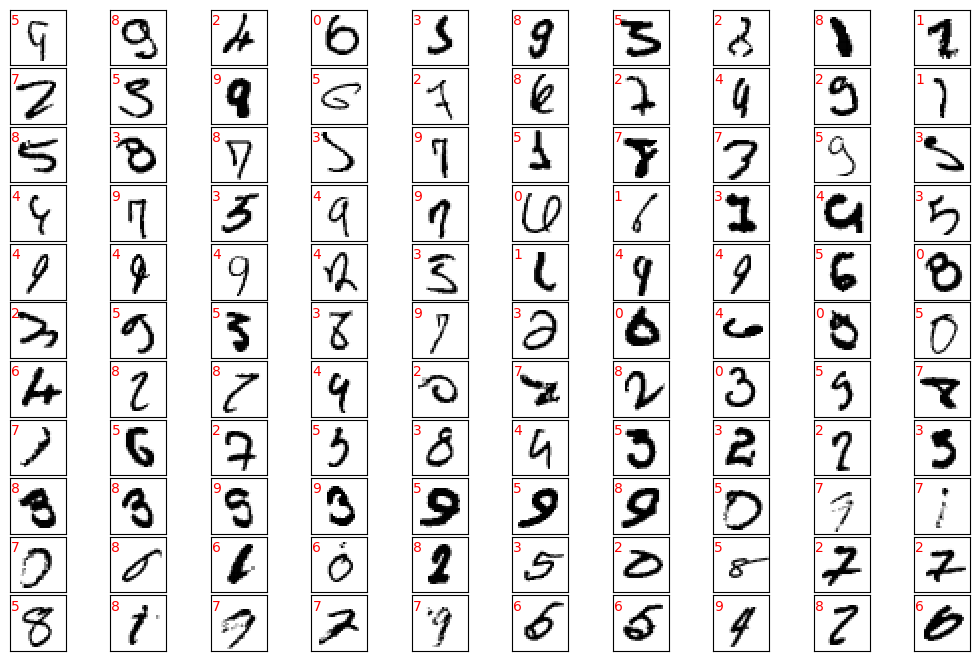

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace = 0.05, wspace=0.05)
j=0
for i in range(10000):
  if predicted[i] !=np.argmax(y_test[i]):
    ax = fig.add_subplot(12,10,j+1,xticks=[], yticks=[])
    ax.imshow(x_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0,7,predicted[i], color='red')
    j = j+1